### Questions:
1. Which genres are the most common (Number of movies made)?
2. Which movie geners have high avg budget and revenue?
3. Which movie genres have high profit?
4. Which generes have high avg popularity?
5. Which geners have highest number of movies with an voting average >= 8?

### Research Hypothesis (H):
1. The best movies according to vote average return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv(r'E:\Data Analytics\Pandas\pandas mastery\13.real world projects\imdb_movies.csv')
movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Check for duplicates
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
# Removing duplicates
movies.drop_duplicates(inplace = True)

In [7]:
# Checking the geners which have null
movies.dropna(subset = ['genres'], inplace = True)

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [9]:
# Calucalting the profit(Question 3)
movies['profit'] = movies['revenue'] - movies['budget']

In [36]:
# Keeping only columns that are needed
movies_genres = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_average',
                        'vote_count', 'profit']]

In [37]:
# movies_genres['genres'].str.split('|') => This part of the code divides the dataframe
# .apply(Series,1) => Applying the data to individual series with axis = 1
# .stack() => Keeps all the data to the individual index
from pandas import Series, DataFrame 
movies_genres['genres'].str.split('|').apply(Series,1).stack()

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [46]:
# Getting rid of the second index
split = movies_genres['genres'].str.split('|').apply(Series,1).stack()
# The line of code didn't work but worked for alex the analyst
split_index = split.index.droplevel(-1)
split

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [47]:
movies_genres

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_average,vote_count,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,5562,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,6185,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2480,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,5292,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,7.3,2947,1316249360
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,6/15/66,7.4,11,0
10862,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,12/21/66,5.7,20,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,6.5,11,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,5.4,22,0


In [48]:
split.reset_index(level = 1, drop = True, inplace = True)

In [49]:
split

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Length: 26955, dtype: object

In [50]:
split.name = 'genres_split'
del movies_genres['genres']
movies_genres = movies_genres.join(split)

In [51]:
movies_genres

,popularity,budget,revenue,original_title,runtime,release_date,vote_average,vote_count,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,6.5,5562,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,6.5,5562,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,6.5,5562,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,6.5,5562,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,7.1,6185,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,6.5,11,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,6.5,11,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,5.4,22,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,5.4,22,0,Comedy


1. Which genres are the most common (Number of movies made)?

In [55]:
# Counting the values and making it into a data frame
pd.DataFrame(movies_genres.groupby('genres_split').original_title.nunique()).sort_values('original_title',ascending = False)

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


In [56]:
genres_count = pd.DataFrame(movies_genres.groupby('genres_split').original_title.nunique()).
                          sort_values('original_title',ascending = False)

<Axes: title={'center': 'Movies per Genres in %'}, ylabel='original_title'>

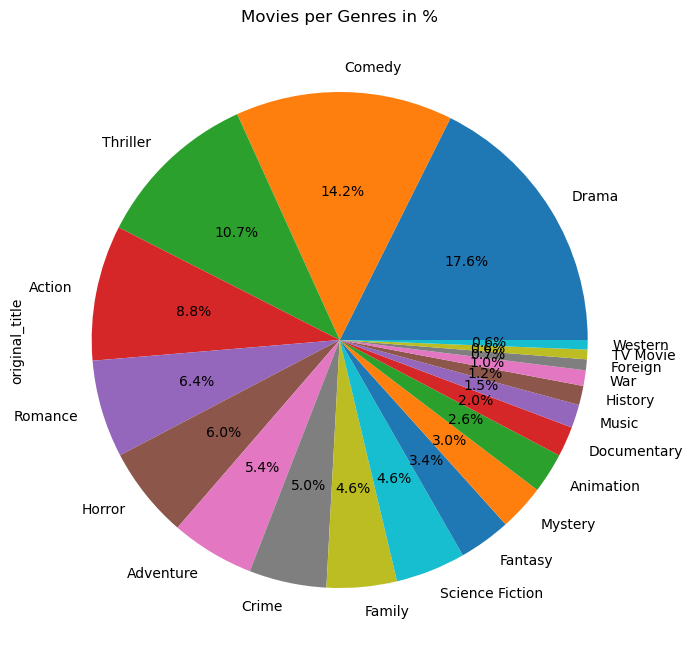

In [66]:
genres_count['original_title'].plot.pie(title = 'Movies per Genres in %',autopct = '%1.1f%%', figsize = (8,10))

<Axes: title={'center': 'Movies per Genre'}, ylabel='genres_split'>

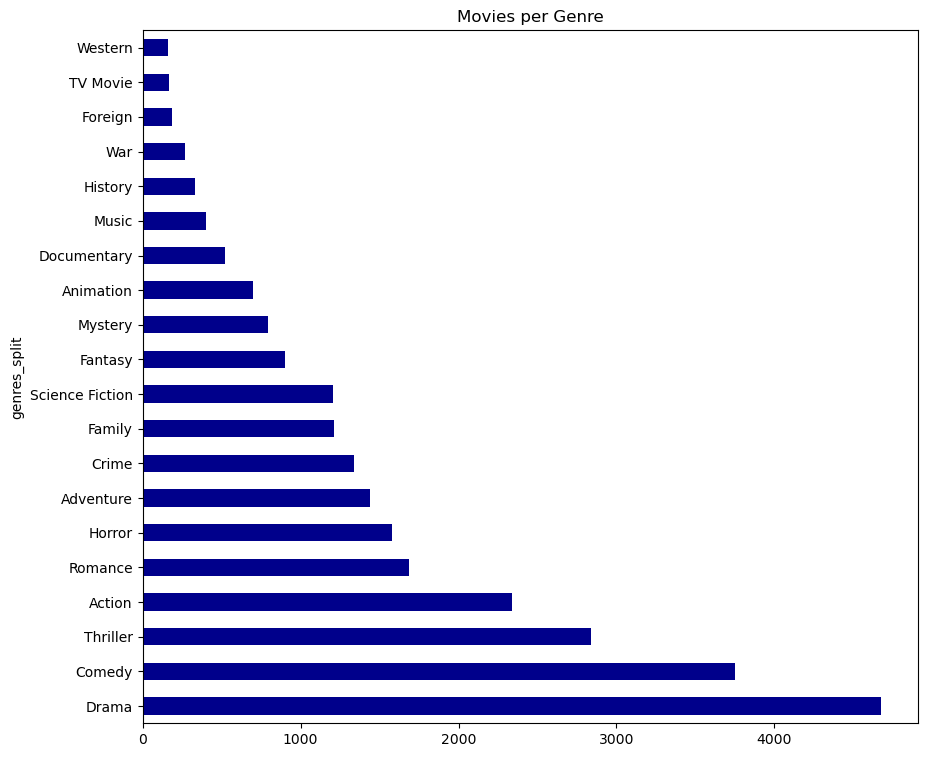

In [68]:
# Making horizantal bar chart
# If we want the bar chart in a reverse way, then we have to change in the genres_count as ascending = True
genres_count['original_title'].plot.barh(title = 'Movies per Genre', color = 'DarkBlue', figsize = (10,9))

2. Which movie geners have high avg budget and revenue?

In [162]:
# Here we need to extract the numerical data from the movies_genres
numerical_data = movies_genres.select_dtypes(include = ['int','float'])
numerical_data

,popularity,budget,revenue,runtime,vote_average,vote_count,profit
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810
1,28.419936,150000000,378436354,120,7.100000,6185,228436354
...,...,...,...,...,...,...,...
10863,0.065141,0,0,94,6.500000,11,0
10863,0.065141,0,0,94,6.500000,11,0
10864,0.064317,0,0,80,5.400000,22,0
10864,0.064317,0,0,80,5.400000,22,0


In [163]:
# Since, we need to group the data using the genres_split column, we need to add the row to the numerical data
numerical_data['genres_split'] = movies_genres['genres_split'].copy()
numerical_data

,popularity,budget,revenue,runtime,vote_average,vote_count,profit,genres_split
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810,Action
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810,Adventure
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810,Science Fiction
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810,Thriller
1,28.419936,150000000,378436354,120,7.100000,6185,228436354,Action
...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,94,6.500000,11,0,Mystery
10863,0.065141,0,0,94,6.500000,11,0,Comedy
10864,0.064317,0,0,80,5.400000,22,0,Action
10864,0.064317,0,0,80,5.400000,22,0,Comedy


In [77]:
# Calucalting the mean of the data
genres_avg = numerical_data.groupby('genres_split').mean()

In [78]:
genres_avg

,popularity,budget,revenue,runtime,vote_average,vote_count,profit
genres_split,,,,,,,
Action,0.926274,2.772782e+07,7.279473e+07,104.917785,5.787752,392.993708,4.506691e+07
Adventure,1.154259,3.754369e+07,1.131379e+08,106.173351,5.940585,513.125085,7.559417e+07
Animation,0.852182,2.315978e+07,7.525606e+07,68.181688,6.403147,303.000000,5.209628e+07
Comedy,0.592607,1.329792e+07,3.752624e+07,96.745057,5.905167,176.436330,2.422833e+07
Crime,0.744930,1.766380e+07,4.236866e+07,106.917282,6.124889,278.805022,2.470486e+07
Documentary,0.181432,5.771491e+05,2.041107e+06,102.651923,6.908462,35.105769,1.463958e+06
Drama,0.591495,1.188072e+07,2.923226e+07,110.478151,6.165546,182.544538,1.735154e+07
Family,0.786668,2.335934e+07,7.243318e+07,89.603574,5.997563,272.320877,4.907384e+07
Fantasy,0.992840,3.261259e+07,9.631366e+07,100.736900,5.863537,420.741266,6.370107e+07


In [79]:
# Changing the data from scientific format to noraml format
pd.options.display.float_format = '{:2f}'.format
genres_avg

,popularity,budget,revenue,runtime,vote_average,vote_count,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,5.787752,392.993708,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,5.940585,513.125085,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,6.403147,303.000000,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,5.905167,176.436330,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,6.124889,278.805022,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,6.908462,35.105769,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,6.165546,182.544538,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,5.997563,272.320877,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,5.863537,420.741266,63701071.733624


<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

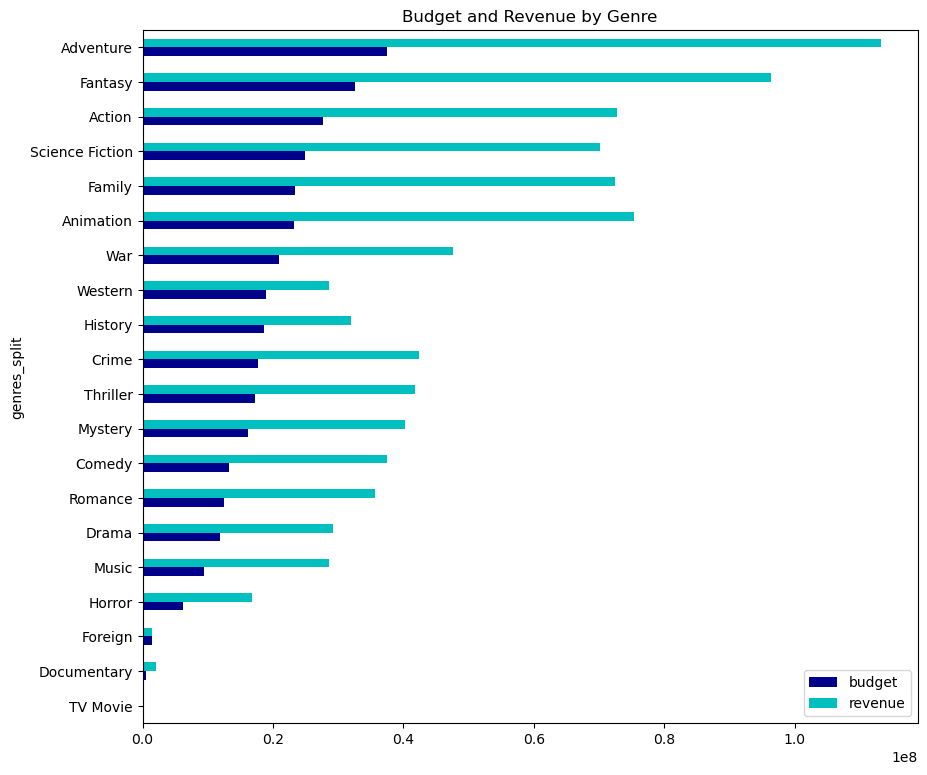

In [82]:
genres_avg.sort_values('budget', ascending = True, inplace = True)
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'), figsize = (10,9))

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

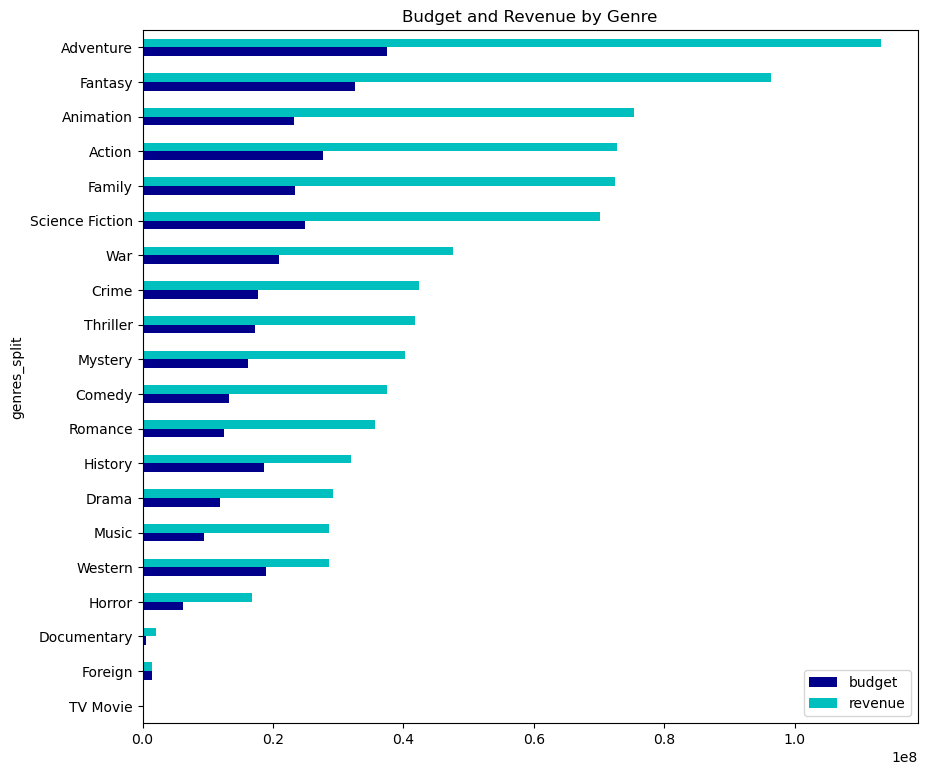

In [83]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'), figsize = (10,9))

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

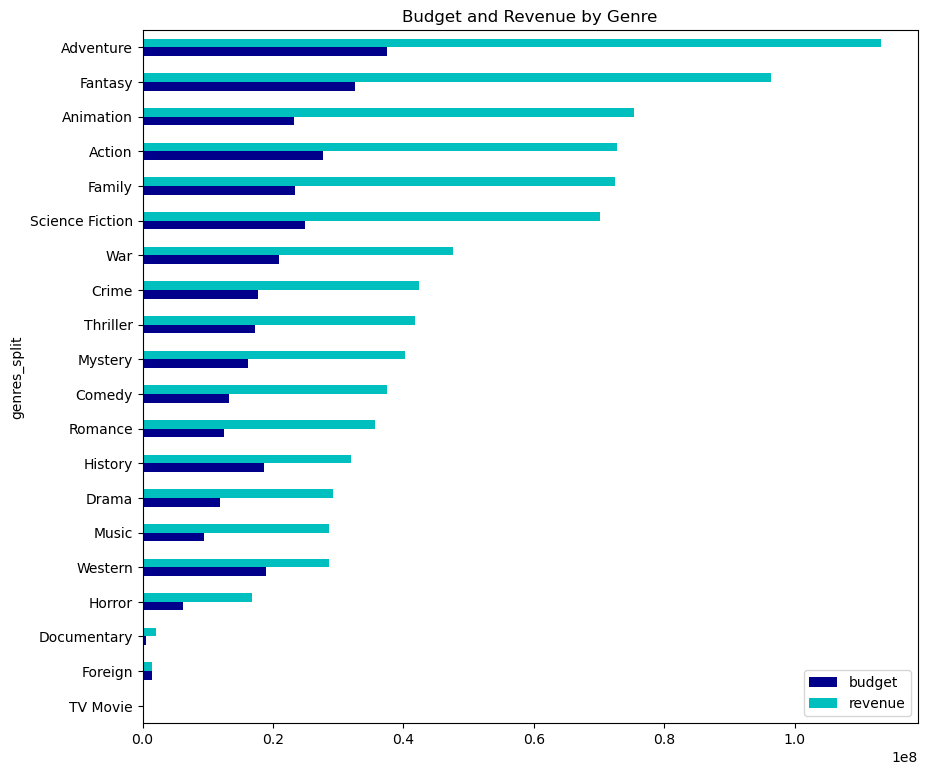

In [87]:
genres_avg.sort_values(by = ['revenue','budget'], ascending = True, inplace = True)
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'), figsize = (10,9))

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

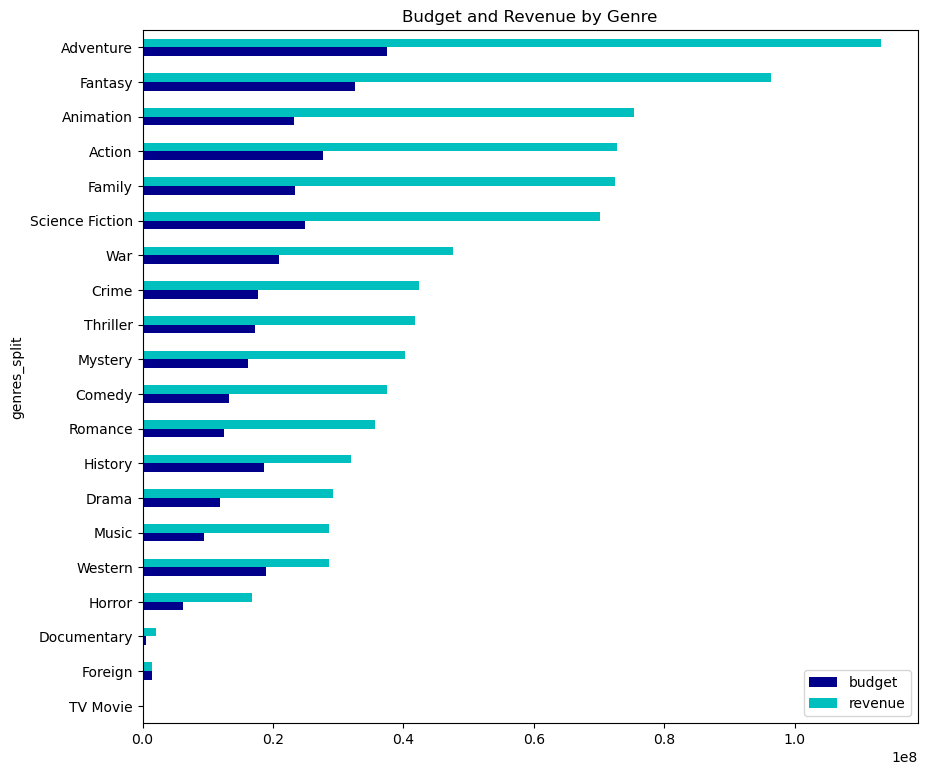

In [89]:
# Sorting the both columns budget and the revenue at the same time
genres_avg.sort_values('budget').astype('str') + genres_avg.sort_values('revenue').astype('str')
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'), figsize = (10,9))

3. Which genres have highest profit?

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

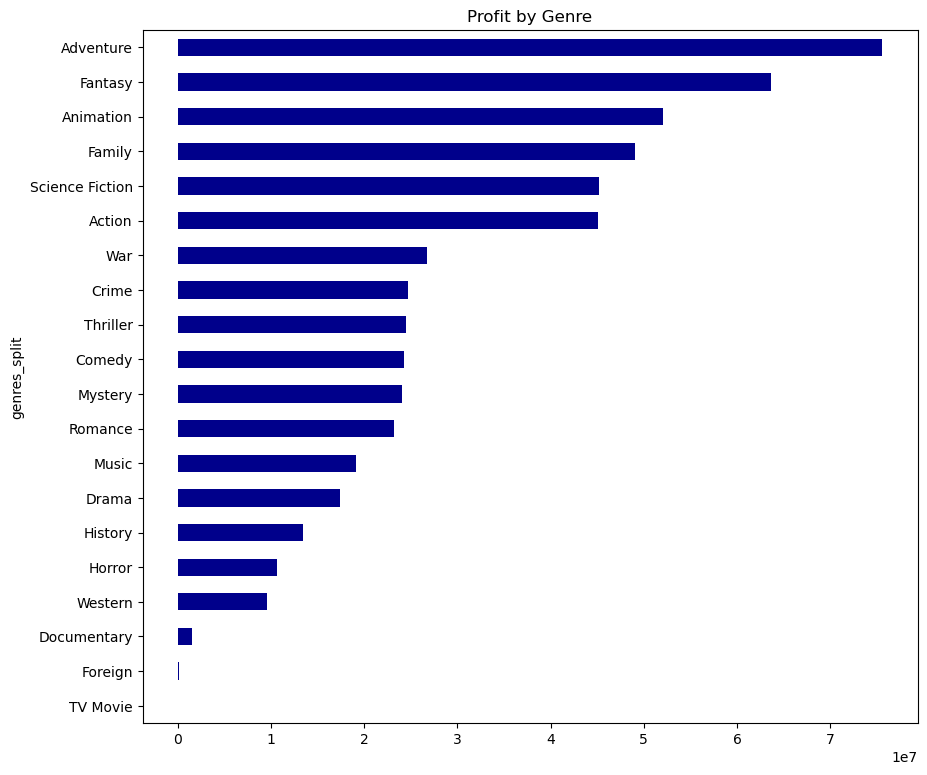

In [90]:
genres_avg.sort_values('profit', ascending = True, inplace = True)
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = 'DarkBlue', figsize = (10,9))

4. Which generes have high avg popularity?

<Axes: title={'center': 'Popualrity by Genre'}, ylabel='genres_split'>

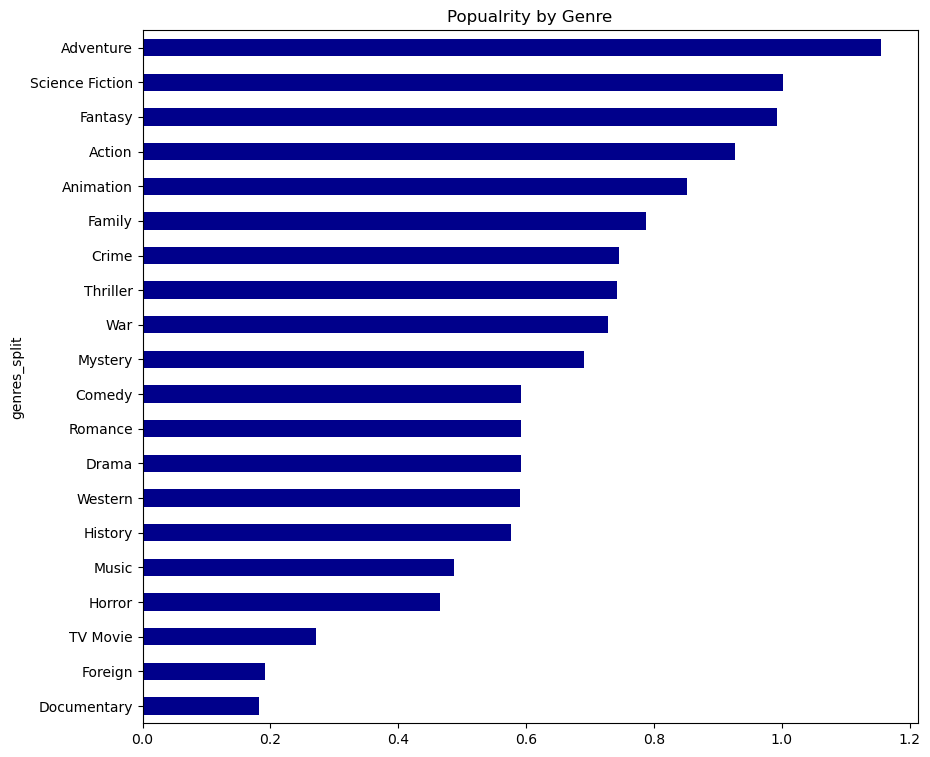

In [92]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)
genres_avg['popularity'].plot.barh(title = 'Popualrity by Genre', color = 'DarkBlue', figsize = (10,9))

5. Which geners have highest number of movies with an voting average >= 8?

The solution that is below is my own solution. What I have done is:
1. We need to make sure that the voting average is greater than or equal to 8.
2. That need to be grouped by geners and the taken has to be with the original_title

In [115]:
avg_greater_than_8 = numerical_data[numerical_data['vote_average'] >= 8].groupby('genres_split').count()
avg_greater_than_8['vote_average'].sort_values(ascending = False)

genres_split
Documentary        34
Drama              30
Music              20
Comedy             14
Crime              12
Animation           9
Thriller            8
Family              7
Science Fiction     7
Romance             5
Adventure           5
Action              4
Horror              4
Fantasy             3
War                 3
Mystery             2
History             2
Name: vote_average, dtype: int64

<Axes: title={'center': 'Popualrity by Genre'}, ylabel='genres_split'>

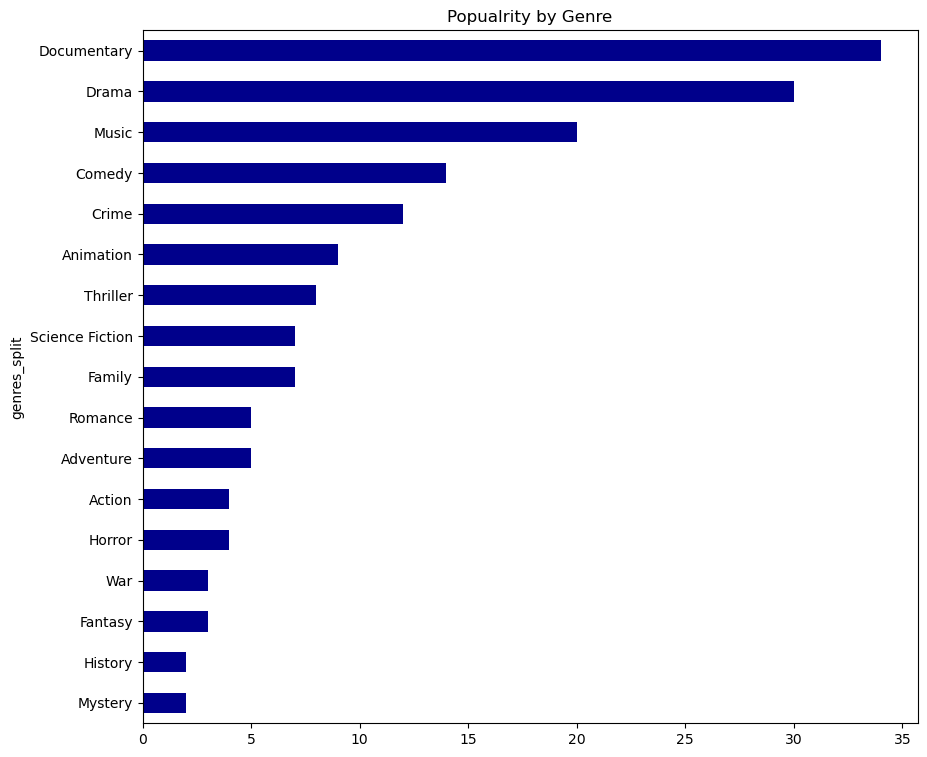

In [117]:
avg_greater_than_8['vote_average'].plot.barh(title = 'Popualrity by Genre', color = 'DarkBlue', figsize = (10,9))

The solution below is the solution by Alex the Analyst

In [118]:
vote_fifty = movies_genres[(movies_genres['vote_count'] >= 50) & (movies_genres['vote_average'] >= 8)]
vote_zero  = movies_genres[movies_genres['vote_average'] >= 8]

In [119]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique())
               .sort_values('vote_average', ascending = True)

In [120]:
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Vote Average bt Genre'}, ylabel='genres_split'>

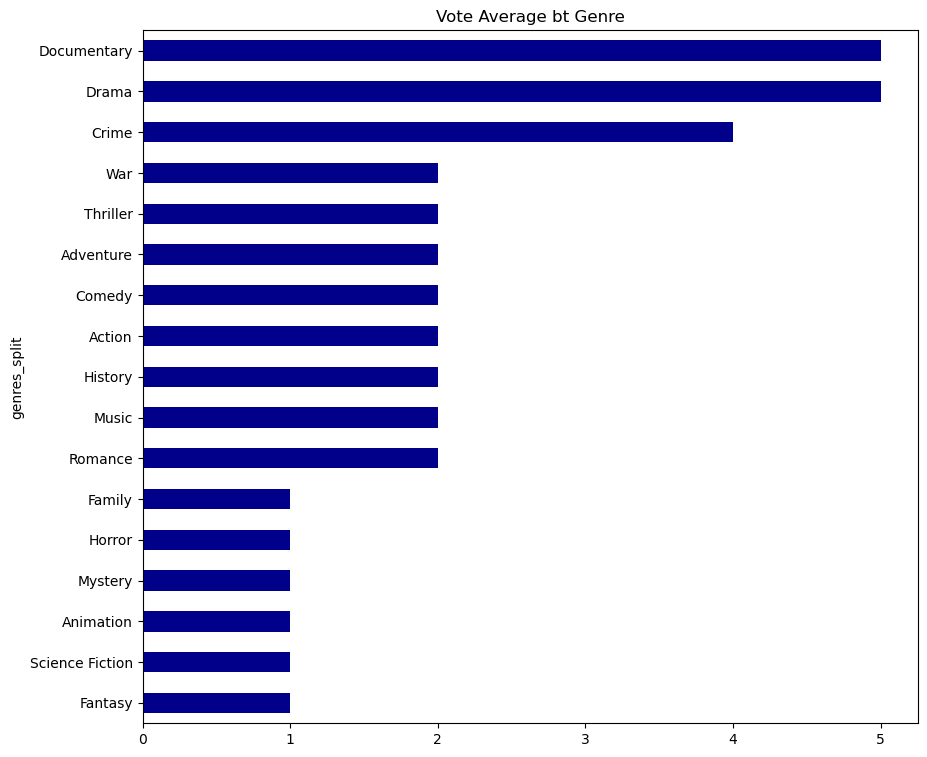

In [122]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average bt Genre', color = 'DarkBlue', figsize = (10,9))

In [124]:
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique())
             .sort_values('vote_average', ascending = True)

In [125]:
genres_vote

,vote_average
genres_split,
Family,1
Action,2
Mystery,2
History,2
Fantasy,2
Adventure,2
War,2
Horror,3
Romance,3


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

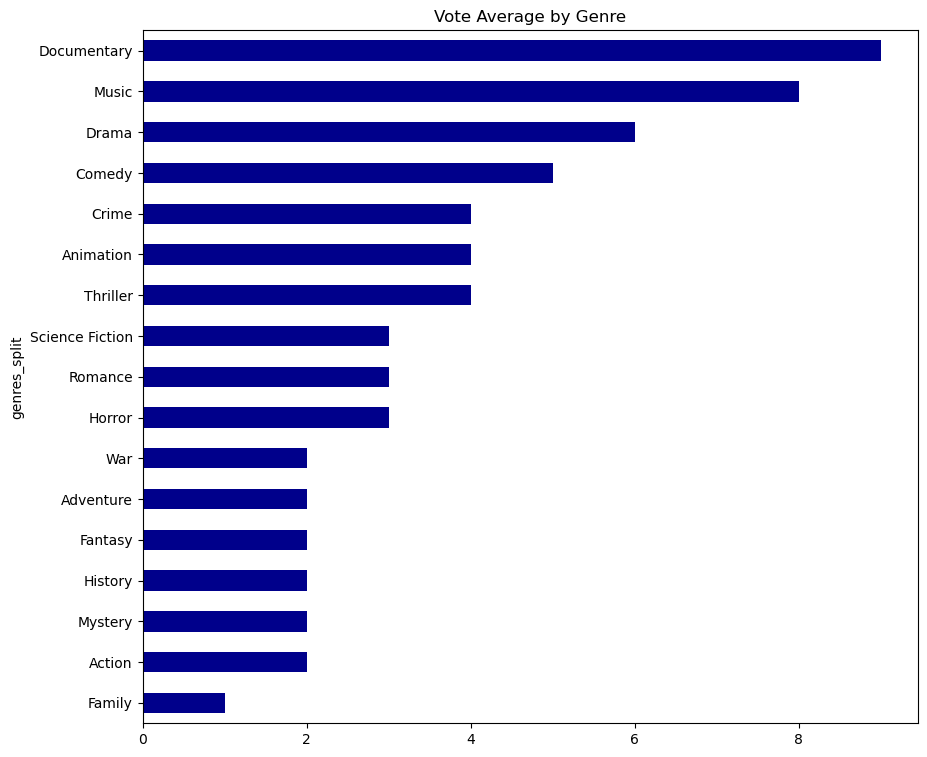

In [126]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', color = 'DarkBlue', figsize = (10,9))

1. The best movies according to vote average return high profit and revenue.

In [127]:
movies = pd.read_csv(r'E:\Data Analytics\Pandas\pandas mastery\13.real world projects\imdb_movies.csv')

In [158]:
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_average',
                        'vote_count', 'profit']]

In [159]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_average,vote_count,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.500000,5562,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.100000,6185,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,6.300000,2480,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.500000,5292,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,7.300000,2947,1316249360


In [160]:
# Checking the correlation between the vote count and (revenue, budget)
# Checking the correlation is because we have a doubt that there are some outliers in the data
numerical_data = movies_genre.select_dtypes(include = ['int', 'float'])
movies_counted = numerical_data[numerical_data['vote_count'] >= 50]
movies_counted.corr(method = 'spearman')

,popularity,budget,revenue,runtime,vote_average,vote_count,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.188670,0.768966,0.498117
budget,0.485149,1.000000,0.714828,0.360230,-0.044440,0.554586,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.111731,0.682656,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.285514,0.263460,0.212060
vote_average,0.188670,-0.044440,0.111731,0.285514,1.000000,0.284470,0.198308
vote_count,0.768966,0.554586,0.682656,0.263460,0.284470,1.000000,0.583602
profit,0.498117,0.334390,0.842221,0.212060,0.198308,0.583602,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

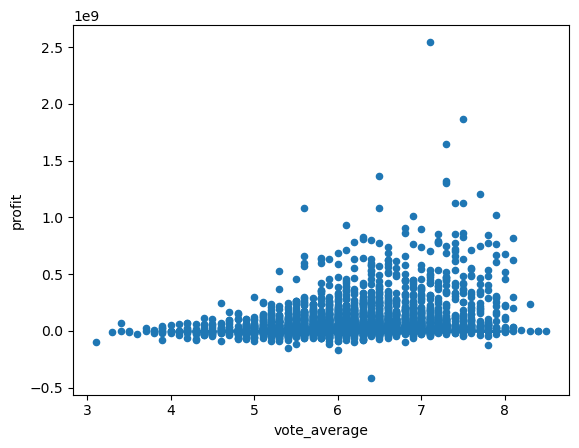

In [137]:
movies_counted.plot.scatter(x = 'vote_average', y = 'profit')

<Axes: xlabel='vote_average', ylabel='profit'>

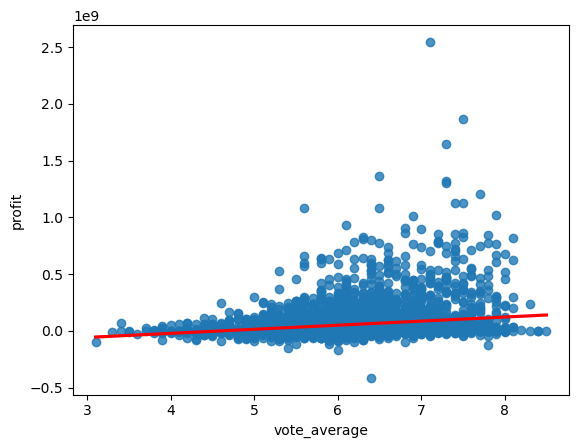

In [138]:
# Through this reg plot we know that if there is an increase in the vote_average there is increase in the profit.
# According to the above graph, it will be the smallest
sns.regplot(x = 'vote_average', y = 'profit', data = movies_counted, line_kws = {'color': 'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

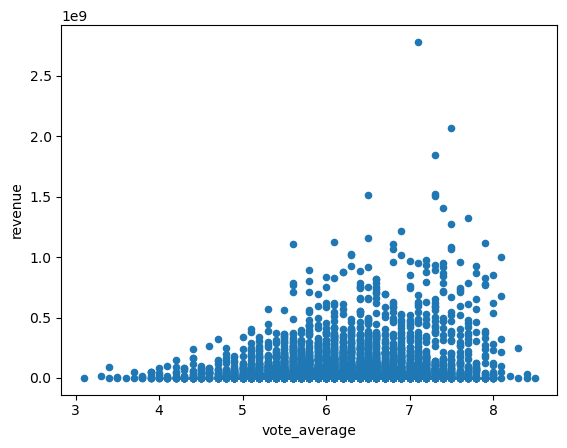

In [139]:
movies_counted.plot.scatter(x = 'vote_average', y = 'revenue')

<Axes: xlabel='vote_average', ylabel='revenue'>

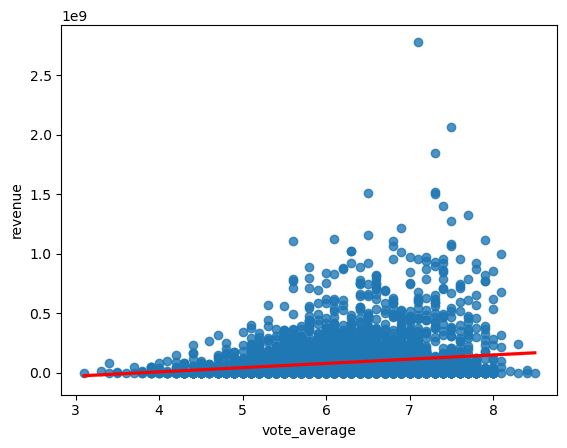

In [140]:
sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {'color': 'red'})

2. The best movies according to popularity return high profit and revenue.

In [141]:
# Checking the correlation between the data
movies_counted.corr()

,popularity,budget,revenue,runtime,vote_average,vote_count,profit
popularity,1.000000,0.458926,0.616012,0.186892,0.246604,0.776101,0.594608
budget,0.458926,1.000000,0.703506,0.263744,-0.004655,0.575313,0.537979
revenue,0.616012,0.703506,1.000000,0.233610,0.171162,0.760077,0.977553
runtime,0.186892,0.263744,0.233610,1.000000,0.210541,0.237413,0.198899
vote_average,0.246604,-0.004655,0.171162,0.210541,1.000000,0.320899,0.204397
vote_count,0.776101,0.575313,0.760077,0.237413,0.320899,1.000000,0.730980
profit,0.594608,0.537979,0.977553,0.198899,0.204397,0.730980,1.000000


<Axes: xlabel='popularity', ylabel='profit'>

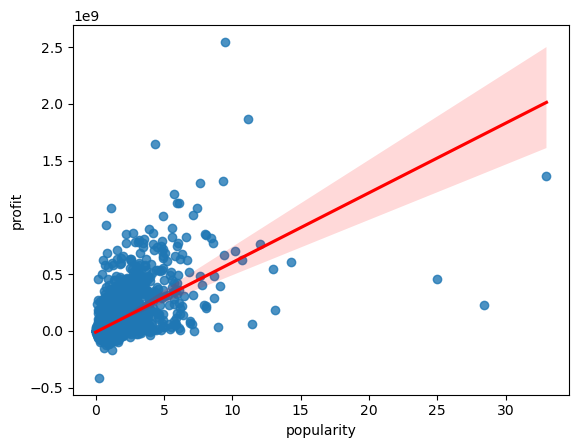

In [142]:
sns.regplot(x = 'popularity', y = 'profit', data = movies_counted, line_kws = {'color':'red'})

<Axes: xlabel='popularity', ylabel='revenue'>

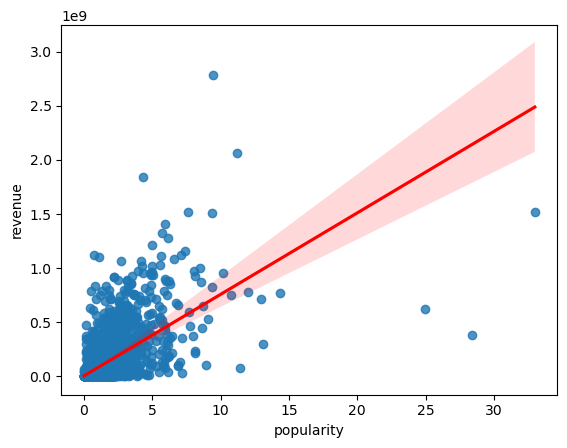

In [144]:
sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws = {'color': 'red'})

3. Highly budgeted movies return high revenue and profit.

<Axes: xlabel='budget', ylabel='profit'>

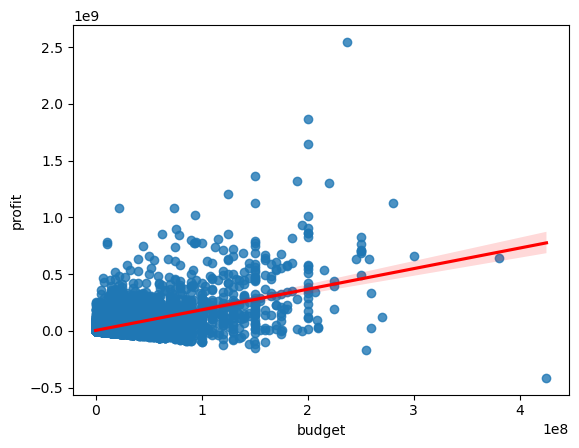

In [145]:
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {'color':'red'})

<Axes: xlabel='budget', ylabel='revenue'>

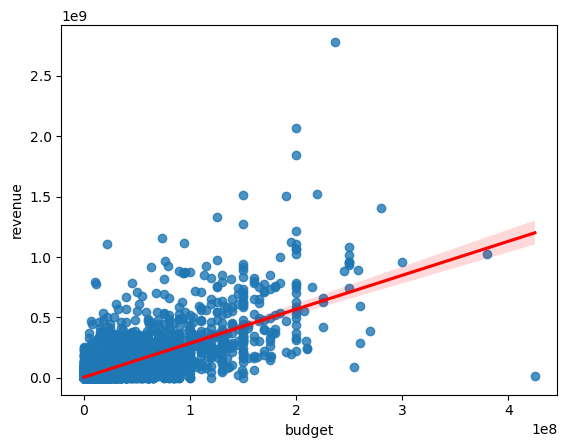

In [146]:
sns.regplot(x = 'budget', y = 'revenue', data = movies_counted, line_kws = {'color':'red'})

4. Highly budgeted movies have a high popularity.

<Axes: xlabel='budget', ylabel='popularity'>

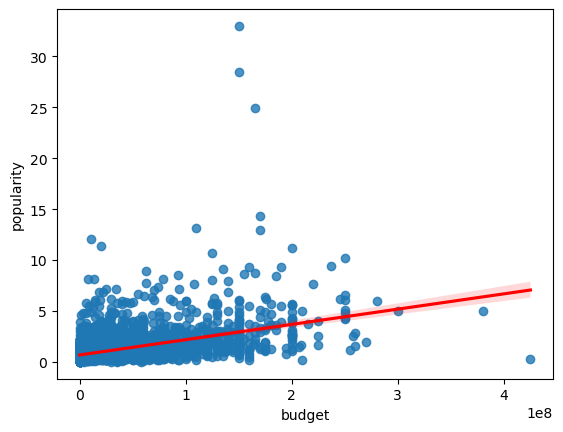

In [147]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {'color':'red'})

5. Profit per genre per Year

In [173]:
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_average',
                        'vote_count', 'profit']]
release_year = movies['release_year']
release_year
split.name = 'genres_split'
del movies_genres['genres']
movies_genres = movies_genres.join(split)

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 10865, dtype: int64

In [174]:
numerical_data['original_title'] = movies_genre['original_title'].copy()
release_year.name = 'release_year'
numerical_data = numerical_data.join(release_year)

In [175]:
numerical_data

,popularity,budget,revenue,runtime,vote_average,vote_count,profit,genres_split,original_title,release_year
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810,Action,Jurassic World,2015
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810,Adventure,Jurassic World,2015
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810,Science Fiction,Jurassic World,2015
0,32.985763,150000000,1513528810,124,6.500000,5562,1363528810,Thriller,Jurassic World,2015
1,28.419936,150000000,378436354,120,7.100000,6185,228436354,Action,Mad Max: Fury Road,2015
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,94,6.500000,11,0,Mystery,Beregis Avtomobilya,1966
10863,0.065141,0,0,94,6.500000,11,0,Comedy,Beregis Avtomobilya,1966
10864,0.064317,0,0,80,5.400000,22,0,Action,"What's Up, Tiger Lily?",1966
10864,0.064317,0,0,80,5.400000,22,0,Comedy,"What's Up, Tiger Lily?",1966


In [178]:
time_genre = pd.DataFrame(numerical_data.groupby(['release_year','genres_split'])['profit'].mean())

In [180]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

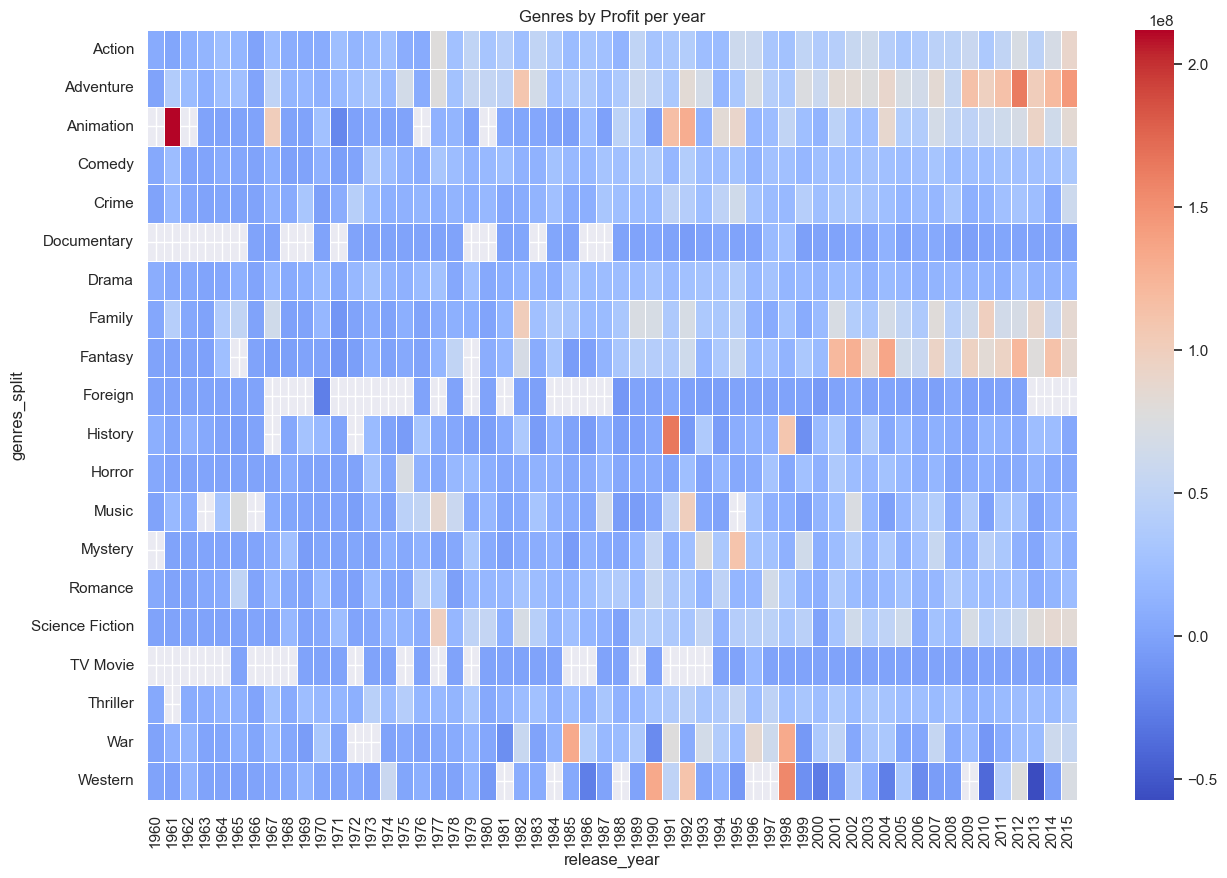

In [183]:
sns.set(rc = {'figure.figsize' : (15,10)})
sns.heatmap(final_genre, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Genres by Profit per year')
plt.show()

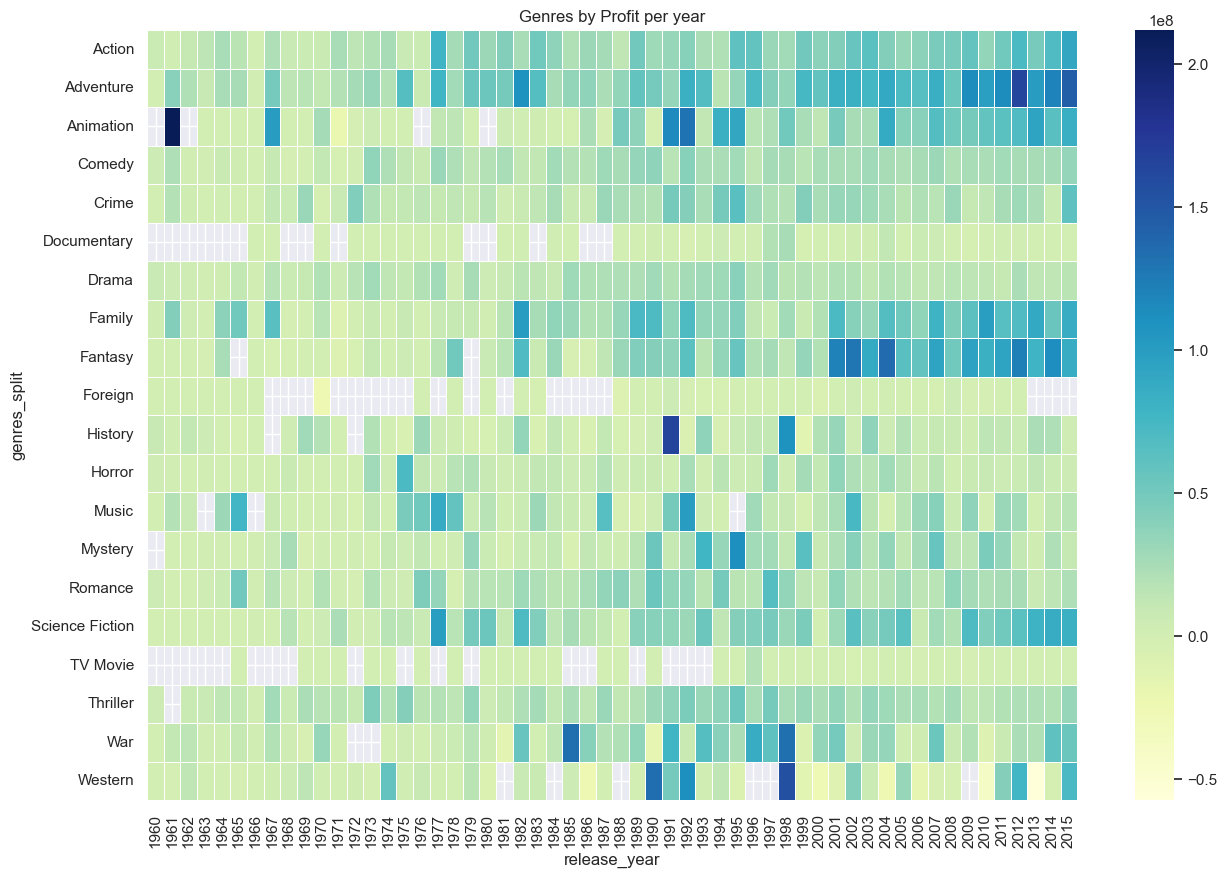

In [184]:
sns.set(rc = {'figure.figsize' : (15,10)})
sns.heatmap(final_genre, cmap = 'YlGnBu', linewidths = 0.5)
plt.title('Genres by Profit per year')
plt.show()